In [49]:
import re
import string
import numpy as np 
import random
import pandas as pd 
# %matplotlibe inline
import matplotlib.pyplot as plt
import seaborn as sns
# %matplotlib inline
from plotly import graph_objs as go
import plotly.express as px
import plotly.figure_factory as ff
from collections import Counter



In [2]:
from PIL import Image
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator


import nltk
from nltk.corpus import stopwords

from tqdm import tqdm
import os
import nltk
import spacy
import random
from spacy.util import compounding
from spacy.util import minibatch


In [3]:

import warnings
warnings.filterwarnings("ignore")

import os


In [4]:
for dirname, _, filenames in os.walk('/Users/arslanaliawan/Desktop/testing/'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

/Users/arslanaliawan/Desktop/testing/.DS_Store
/Users/arslanaliawan/Desktop/testing/test.ipynb
/Users/arslanaliawan/Desktop/testing/Twitter_sentiment_extraction/test.csv
/Users/arslanaliawan/Desktop/testing/Twitter_sentiment_extraction/train.csv
/Users/arslanaliawan/Desktop/testing/Twitter_sentiment_extraction/sample_submission.csv
/Users/arslanaliawan/Desktop/testing/env/.DS_Store
/Users/arslanaliawan/Desktop/testing/env/pyvenv.cfg
/Users/arslanaliawan/Desktop/testing/env/bin/pip3.9
/Users/arslanaliawan/Desktop/testing/env/bin/Activate.ps1
/Users/arslanaliawan/Desktop/testing/env/bin/python3
/Users/arslanaliawan/Desktop/testing/env/bin/easy_install
/Users/arslanaliawan/Desktop/testing/env/bin/python
/Users/arslanaliawan/Desktop/testing/env/bin/pip3
/Users/arslanaliawan/Desktop/testing/env/bin/activate.fish
/Users/arslanaliawan/Desktop/testing/env/bin/easy_install-3.9
/Users/arslanaliawan/Desktop/testing/env/bin/python3.9
/Users/arslanaliawan/Desktop/testing/env/bin/pip
/Users/arslanal

In [5]:
def random_colours(number_of_colors):
    '''
    Simple function for random colours generation.
    Input:
        number_of_colors - integer value indicating the number of colours which are going to be generated.
    Output:
        Color in the following format: ['#E86DA4'] .
    '''
    colors = []
    for i in range(number_of_colors):
        colors.append("#"+''.join([random.choice('0123456789ABCDEF') for j in range(6)]))
    return colors

In [6]:
train = pd.read_csv('/Users/arslanaliawan/Desktop/testing/Twitter_sentiment_extraction/train.csv')
test = pd.read_csv('/Users/arslanaliawan/Desktop/testing/Twitter_sentiment_extraction/test.csv')
ss = pd.read_csv('/Users/arslanaliawan/Desktop/testing/Twitter_sentiment_extraction/sample_submission.csv')

In [7]:
train.shape

(27481, 4)

In [8]:
test.shape

(3534, 3)

In [9]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27481 entries, 0 to 27480
Data columns (total 4 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   textID         27481 non-null  object
 1   text           27480 non-null  object
 2   selected_text  27480 non-null  object
 3   sentiment      27481 non-null  object
dtypes: object(4)
memory usage: 858.9+ KB


In [10]:
#remove the one null value from train, as we dont need it

In [11]:
train.dropna(inplace=True)

In [12]:
train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 27480 entries, 0 to 27480
Data columns (total 4 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   textID         27480 non-null  object
 1   text           27480 non-null  object
 2   selected_text  27480 non-null  object
 3   sentiment      27480 non-null  object
dtypes: object(4)
memory usage: 1.0+ MB


In [13]:
#EDA

In [14]:
train.head()

,textID,text,selected_text,sentiment
0,cb774db0d1,"I`d have responded, if I were going","I`d have responded, if I were going",neutral
1,549e992a42,Sooo SAD I will miss you here in San Diego!!!,Sooo SAD,negative
2,088c60f138,my boss is bullying me...,bullying me,negative
3,9642c003ef,what interview! leave me alone,leave me alone,negative
4,358bd9e861,"Sons of ****, why couldn`t they put them on t...","Sons of ****,",negative


In [15]:
train.describe()

,textID,text,selected_text,sentiment
count,27480,27480,27480,27480
unique,27480,27480,22463,3
top,b6d449ddb9,I`m still on the bandwagon. Figured I`ve been...,good,neutral
freq,1,1,199,11117


In [16]:
temp = train.groupby('sentiment').count()['text'].reset_index().sort_values(by='text',ascending=False)
temp.style.background_gradient(cmap='Purples')

,sentiment,text
1,neutral,11117
2,positive,8582
0,negative,7781


In [35]:
# plt.figure(figsize=(12,6))
# sns.countplot(x='sentiment',data=train)

In [21]:
%matplotlib inline
import matplotlib.pyplot as plt

In [37]:
# fig = go.Figure(go.Funnelarea(
#     text =temp.sentiment,
#     values = temp.text,
#     title = {"position": "top center", "text": "Funnel-Chart of Sentiment Distribution"}
#     ))
# fig.show()

In [38]:
# fig.show()

In [39]:
# more useful features to generate would be :-

# Difference In Number Of words of Selected_text and Text
# Jaccard Similarity Scores between text and Selected_text
# Thus it will not be useful for us to generate features we used before as they are of no importance here

In [40]:
def jaccard(str1, str2): 
    a = set(str1.lower().split()) 
    b = set(str2.lower().split())
    c = a.intersection(b)
    return float(len(c)) / (len(a) + len(b) - len(c))

In [41]:
results_jaccard=[]

for ind,row in train.iterrows():
    sentence1 = row.text
    sentence2 = row.selected_text

    jaccard_score = jaccard(sentence1,sentence2)
    results_jaccard.append([sentence1,sentence2,jaccard_score])

In [42]:
jaccard = pd.DataFrame(results_jaccard,columns=["text","selected_text","jaccard_score"])
train = train.merge(jaccard,how='outer')

In [43]:
#Number Of words in Selected Text
train['Num_words_ST'] = train['selected_text'].apply(lambda x:len(str(x).split()))

#Number Of words in main text
train['Num_word_text'] = train['text'].apply(lambda x:len(str(x).split())) 

#Difference in Number of words text and Selected Text
train['difference_in_words'] = train['Num_word_text'] - train['Num_words_ST'] 

In [44]:
train.head()

,textID,text,selected_text,sentiment,jaccard_score,Num_words_ST,Num_word_text,difference_in_words
0,cb774db0d1,"I`d have responded, if I were going","I`d have responded, if I were going",neutral,1.000000,7,7,0
1,549e992a42,Sooo SAD I will miss you here in San Diego!!!,Sooo SAD,negative,0.200000,2,10,8
2,088c60f138,my boss is bullying me...,bullying me,negative,0.166667,2,5,3
3,9642c003ef,what interview! leave me alone,leave me alone,negative,0.600000,3,5,2
4,358bd9e861,"Sons of ****, why couldn`t they put them on t...","Sons of ****,",negative,0.214286,3,14,11


In [50]:
hist_data = [train['Num_words_ST'],train['Num_word_text']]

group_labels = ['Selected_Text', 'Text']

# Create distplot with custom bin_size
plt.fig = ff.create_distplot(hist_data, group_labels,show_curve=False)
plt.fig.update_layout(title_text='Distribution of Number Of words')
plt.fig.update_layout(
    autosize=False,
    width=900,
    height=700,
    paper_bgcolor="LightSteelBlue",
)
plt.show()

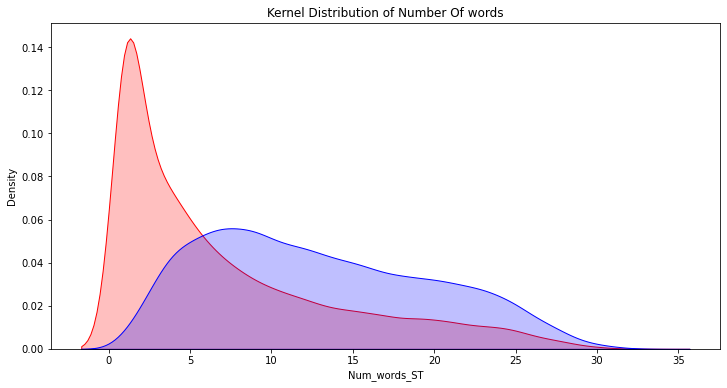

In [51]:
plt.figure(figsize=(12,6))
p1=sns.kdeplot(train['Num_words_ST'], shade=True, color="r").set_title('Kernel Distribution of Number Of words')
p1=sns.kdeplot(train['Num_word_text'], shade=True, color="b")

In [47]:
# Now It will be more interesting to see the differnce in number of words and 
# jaccard_scores across different Sentiments

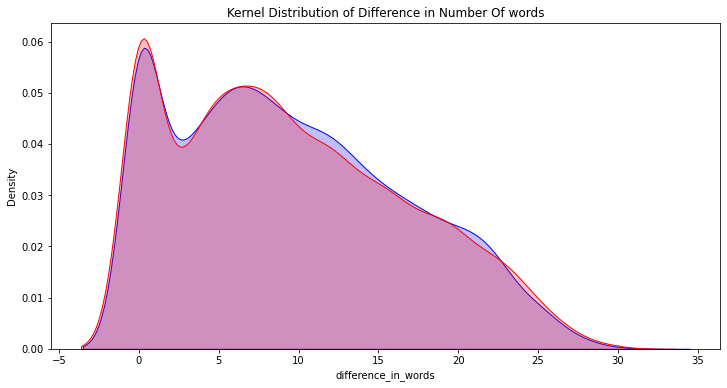

In [52]:
plt.figure(figsize=(12,6))
p1=sns.kdeplot(train[train['sentiment']=='positive']['difference_in_words'], shade=True, color="b").set_title('Kernel Distribution of Difference in Number Of words')
p2=sns.kdeplot(train[train['sentiment']=='negative']['difference_in_words'], shade=True, color="r")

<AxesSubplot:xlabel='difference_in_words'>

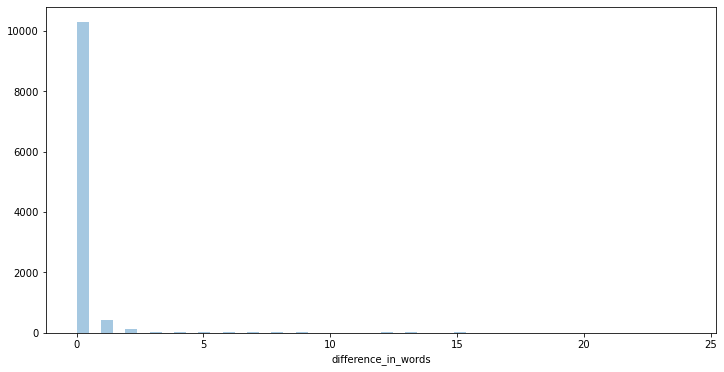

In [53]:
plt.figure(figsize=(12,6))
sns.distplot(train[train['sentiment']=='neutral']['difference_in_words'],kde=False)

In [54]:
# I was not able to plot kde plot for neutral tweets because most of the values 
# for difference in number of words were zero. We can see it clearly now ,if we
# had used the feature in the starting we would have known that text and selected 
# text are mostly the same for neutral tweets,thus its always
# important to keep the end goal in mind while performing EDA

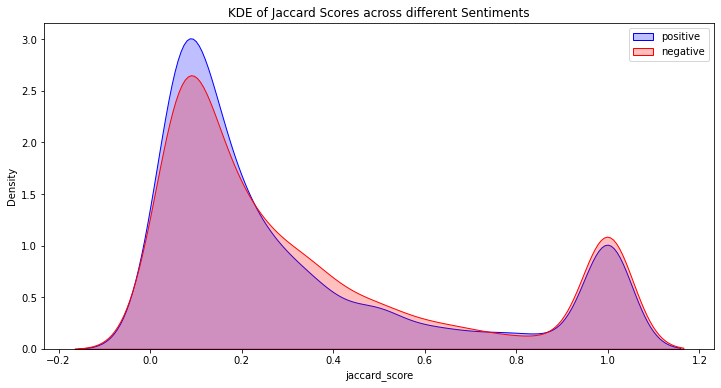

In [55]:
plt.figure(figsize=(12,6))
p1=sns.kdeplot(train[train['sentiment']=='positive']['jaccard_score'], shade=True, color="b").set_title('KDE of Jaccard Scores across different Sentiments')
p2=sns.kdeplot(train[train['sentiment']=='negative']['jaccard_score'], shade=True, color="r")
plt.legend(labels=['positive','negative'])

In [56]:
# I was not able to plot kde of jaccard_scores of neutral tweets for
# the same reason,thus I will plot a distribution plot

<AxesSubplot:xlabel='jaccard_score'>

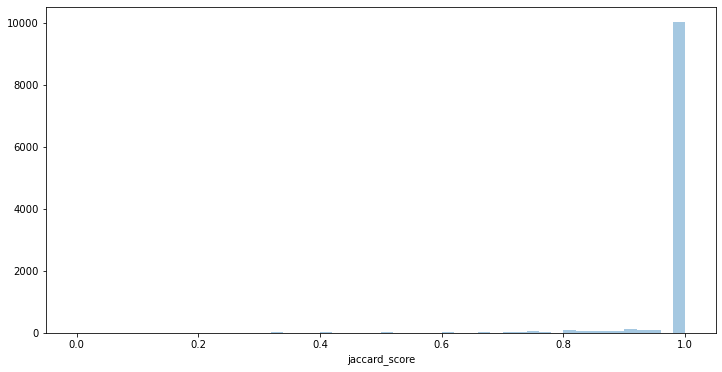

In [57]:
plt.figure(figsize=(12,6))
sns.distplot(train[train['sentiment']=='neutral']['jaccard_score'],kde=False)

In [58]:
# We can see some interesting trends here:

# Positive and negative tweets have high kurtosis and thus values are concentrated in two regions narrow
# and high density
# Neutral tweets have a low kurtosis value and their is bump in density near values of 1
# For those who don't know :

# Kurtosis is the measure of how peaked a distribution is and how much spread it is around that peak
# Skewness measures how much a curve deviates from a normal distribution
# Conclusion Of EDA
# We can see from the jaccard score plot that there is peak for negative and positive plot around score
# of 1 .That means there is a cluster of tweets where there is a high similarity between text and selected
# texts ,if we can find those clusters then we can predict text for selected texts for those tweets irrespective
# of segment
# Let's see if we can find those clusters,one interesting idea would be to check tweets which have
# number of words lesss than 3 in text, because there the text might be completely used as text

In [59]:
k = train[train['Num_word_text']<=2]

In [60]:
k

,textID,text,selected_text,sentiment,jaccard_score,Num_words_ST,Num_word_text,difference_in_words
7,50e14c0bb8,Soooo high,Soooo high,neutral,1.0,2,2,0
26,852edc3769,I`m sorry.,I`m sorry.,negative,1.0,2,2,0
42,2e7082d1c8,MAYDAY?!,MAYDAY?!,neutral,1.0,1,1,0
61,a4b0888da6,haha yes,haha yes,neutral,1.0,2,2,0
68,fa2654e730,Chilliin,Chilliin,positive,1.0,1,1,0
...,...,...,...,...,...,...,...,...
27251,a68443a78b,This year,This year,neutral,1.0,2,2,0
27280,adb7ab12f3,stop itt!,stop itt!,neutral,1.0,2,2,0
27292,47c474aaf1,Good choice,Good,positive,0.5,1,2,1
27421,b3270b06a3,"Plan, successful?","Plan, successful?",neutral,1.0,2,2,0


In [61]:
k.groupby('sentiment').mean()['jaccard_score']

sentiment
negative    0.788580
neutral     0.977805
positive    0.765700
Name: jaccard_score, dtype: float64

In [62]:
k[k['sentiment']=='positive']

,textID,text,selected_text,sentiment,jaccard_score,Num_words_ST,Num_word_text,difference_in_words
68,fa2654e730,Chilliin,Chilliin,positive,1.0,1,1,0
80,bbbc46889b,THANK YYYYYYYYYOOOOOOOOOOUUUUU!,THANK YYYYYYYYYOOOOOOOOOOUUUUU!,positive,1.0,2,2,0
170,f3d95b57b1,good morning,good morning,positive,1.0,2,2,0
278,89d5b3f0b5,Thanks,Thanks,positive,1.0,1,1,0
429,a78ef3e0d0,Goodmorning,Goodmorning,positive,1.0,1,1,0
...,...,...,...,...,...,...,...,...
26689,e80c242d6a,Goodnight;,Goodnight;,positive,1.0,1,1,0
26725,aad244f37d,*hug*,*hug*,positive,1.0,1,1,0
26842,a46571fe12,congrats!,congrats!,positive,1.0,1,1,0
26959,49a942e9b1,Happy birthday.,Happy birthday.,positive,1.0,2,2,0


In [63]:
k[k['sentiment']=='negative']

,textID,text,selected_text,sentiment,jaccard_score,Num_words_ST,Num_word_text,difference_in_words
26,852edc3769,I`m sorry.,I`m sorry.,negative,1.0,2,2,0
124,f0460d611d,not well,not well,negative,1.0,2,2,0
144,7e4ed52c4a,Hate fighting,Hate fighting,negative,1.0,2,2,0
218,a8734230b6,Ew traffic,Ew traffic,negative,1.0,2,2,0
328,0404648e1c,?sucks!?..,?sucks!?..,negative,1.0,1,1,0
...,...,...,...,...,...,...,...,...
26259,cfedf94a53,"ohh, ouch",ouch,negative,0.5,1,2,1
26753,b6f6bd82c0,careless,careless,negative,1.0,1,1,0
26797,0e2f13043e,reaaaallly bored,reaaaallly bored,negative,1.0,2,2,0
26850,b732cd6641,I`m sorry,I`m sorry,negative,1.0,2,2,0


In [64]:
k[k['sentiment']=='neutral']

,textID,text,selected_text,sentiment,jaccard_score,Num_words_ST,Num_word_text,difference_in_words
7,50e14c0bb8,Soooo high,Soooo high,neutral,1.0,2,2,0
42,2e7082d1c8,MAYDAY?!,MAYDAY?!,neutral,1.0,1,1,0
61,a4b0888da6,haha yes,haha yes,neutral,1.0,2,2,0
111,f0c1601d8b,has tickets.......?,has tickets.......?,neutral,1.0,2,2,0
127,8e1583cb08,Absolutely,Absolutely,neutral,1.0,1,1,0
...,...,...,...,...,...,...,...,...
27235,b6ffd0c214,Doctors appt,Doctors appt,neutral,1.0,2,2,0
27251,a68443a78b,This year,This year,neutral,1.0,2,2,0
27280,adb7ab12f3,stop itt!,stop itt!,neutral,1.0,2,2,0
27421,b3270b06a3,"Plan, successful?","Plan, successful?",neutral,1.0,2,2,0


In [65]:
# Thus its clear that most of the times , text is used as selected text.We can improve this by preprocessing 
# the text which have word length less than 3.We will remember this information and use it in model building

# Cleaning the Corpus

# Now Before We Dive into extracting information out of words in text and selected text,let's first clean the data

In [66]:
def clean_text(text):
    '''Make text lowercase, remove text in square brackets,remove links,remove punctuation
    and remove words containing numbers.'''
    text = str(text).lower()
    text = re.sub('\[.*?\]', '', text)
    text = re.sub('https?://\S+|www\.\S+', '', text)
    text = re.sub('<.*?>+', '', text)
    text = re.sub('[%s]' % re.escape(string.punctuation), '', text)
    text = re.sub('\n', '', text)
    text = re.sub('\w*\d\w*', '', text)
    return text

In [67]:
train['text'] = train['text'].apply(lambda x:clean_text(x))
train['selected_text'] = train['selected_text'].apply(lambda x:clean_text(x))

In [68]:
train.head()

,textID,text,selected_text,sentiment,jaccard_score,Num_words_ST,Num_word_text,difference_in_words
0,cb774db0d1,id have responded if i were going,id have responded if i were going,neutral,1.000000,7,7,0
1,549e992a42,sooo sad i will miss you here in san diego,sooo sad,negative,0.200000,2,10,8
2,088c60f138,my boss is bullying me,bullying me,negative,0.166667,2,5,3
3,9642c003ef,what interview leave me alone,leave me alone,negative,0.600000,3,5,2
4,358bd9e861,sons of why couldnt they put them on the rel...,sons of,negative,0.214286,3,14,11


In [69]:
# Most Common words in our Target-Selected Text

In [70]:
train['temp_list'] = train['selected_text'].apply(lambda x:str(x).split())
top = Counter([item for sublist in train['temp_list'] for item in sublist])
temp = pd.DataFrame(top.most_common(30))
temp.columns = ['Common_words','count']
temp.style.background_gradient(cmap='Blues')

,Common_words,count
0,i,7200
1,to,5305
2,the,4590
3,a,3538
4,my,2783
5,you,2624
6,and,2321
7,it,2158
8,is,2115
9,in,1986


In [71]:
fig = px.bar(temp, x=x, y=y, title='Commmon Words in Selected Text', orientation='h', width=700, height=700,color='Common_words')
fig.show()

NameError: name 'x' is not defined

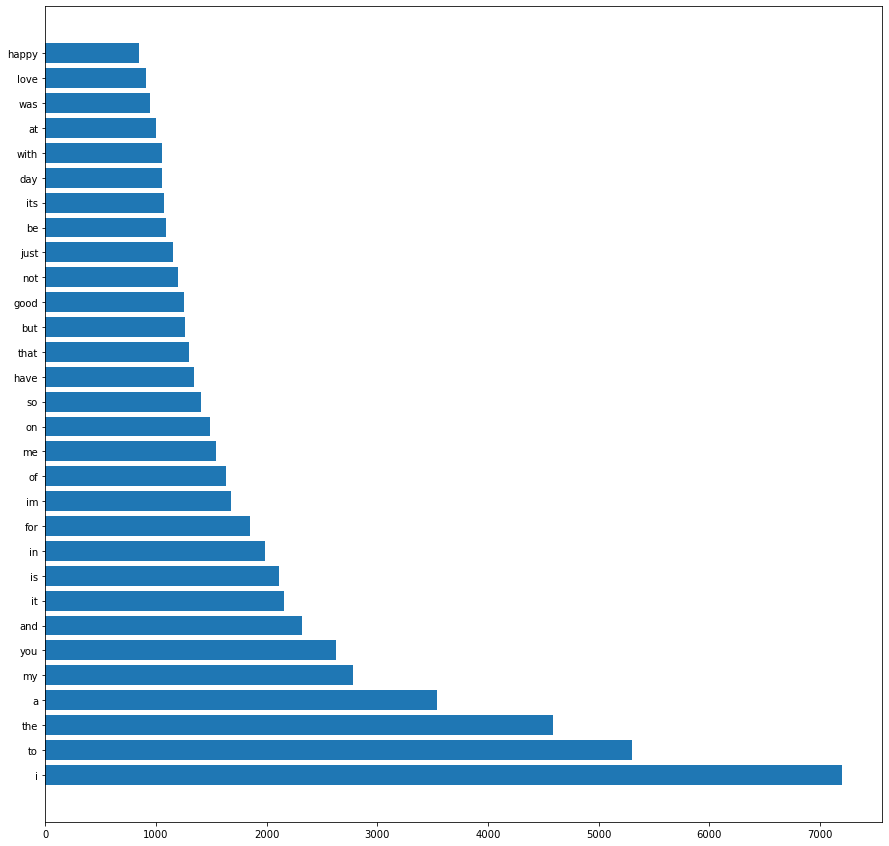

In [72]:
plt.figure(figsize=(15,15))
height = temp['count']
bars = temp['Common_words']
y_pos = np.arange(len(bars))
 
# Create horizontal bars
plt.barh(y_pos, height)
 
# Create names on the x-axis
plt.yticks(y_pos, bars)
 
# Show graphic
plt.show()




In [73]:
# OOPS!While we cleaned our dataset we didnt remove the stop words and
# hence we can see the most coomon word is 'to' . 
# Let's try again after removing the stopwords

In [74]:
def remove_stopword(x):
    return [y for y in x if y not in stopwords.words('english')]

train['temp_list'] = train['temp_list'].apply(lambda x:remove_stopword(x))

In [75]:
top = Counter([item for sublist in train['temp_list'] for item in sublist])
temp = pd.DataFrame(top.most_common(31))
temp = temp.iloc[1:,:]
temp.columns = ['Common_words','count']
temp.style.background_gradient(cmap='Purples')

,Common_words,count
1,good,1251
2,day,1058
3,love,909
4,happy,852
5,like,774
6,get,772
7,dont,765
8,go,700
9,cant,613
10,work,612


In [76]:
fig = px.treemap(temp, path=['Common_words'], values='count',title='Tree of Most Common Words')
fig.show()

In [77]:
# Most Common words in Text

In [78]:
train['temp_list1'] = train['text'].apply(lambda x:str(x).split()) #List of words in every row for text
train['temp_list1'] = train['temp_list1'].apply(lambda x:remove_stopword(x)) #Removing Stopwords

In [79]:
top = Counter([item for sublist in train['temp_list1'] for item in sublist])
temp = pd.DataFrame(top.most_common(31))
temp = temp.iloc[1:,:]
temp.columns = ['Common_words','count']
temp.style.background_gradient(cmap='Blues')

,Common_words,count
1,day,2044
2,good,1549
3,get,1426
4,like,1346
5,go,1267
6,dont,1200
7,love,1122
8,work,1112
9,going,1096
10,today,1096


In [80]:
# SO we can see the Most common words in Selected text and Text are almost the same,which was obvious

In [81]:
# Most common words Sentiments Wise
# Let's look at the most common words in different sentiments

In [82]:
Positive_sent = train[train['sentiment']=='positive']
Negative_sent = train[train['sentiment']=='negative']
Neutral_sent = train[train['sentiment']=='neutral']

In [83]:
top = Counter([item for sublist in Positive_sent['temp_list'] for item in sublist])
temp_positive = pd.DataFrame(top.most_common(10))
temp_positive.columns = ['Common_words','count']
temp_positive.style.background_gradient(cmap='Greens')

,Common_words,count
0,good,826
1,happy,730
2,love,697
3,day,456
4,thanks,439
5,great,364
6,fun,287
7,nice,267
8,mothers,259
9,hope,245


In [84]:
top = Counter([item for sublist in Negative_sent['temp_list'] for item in sublist])
temp_negative = pd.DataFrame(top.most_common(11))
temp_negative.columns = ['Common_words','count']
temp_negative.style.background_gradient(cmap='Greens')

,Common_words,count
0,im,452
1,miss,358
2,sad,343
3,sorry,300
4,bad,246
5,hate,230
6,dont,221
7,cant,201
8,sick,166
9,like,162


In [85]:
#MosT common Neutral words
top = Counter([item for sublist in Neutral_sent['temp_list'] for item in sublist])
temp_neutral = pd.DataFrame(top.most_common(11))
temp_neutral = temp_neutral.loc[1:,:]
temp_neutral.columns = ['Common_words','count']
temp_neutral.style.background_gradient(cmap='Reds')

,Common_words,count
1,get,612
2,go,569
3,day,492
4,dont,482
5,going,472
6,work,467
7,like,445
8,got,441
9,today,427
10,lol,427


In [86]:
raw_text = [word for word_list in train['temp_list1'] for word in word_list]

In [87]:
def words_unique(sentiment,numwords,raw_words):
    '''
    Input:
        segment - Segment category (ex. 'Neutral');
        numwords - how many specific words do you want to see in the final result; 
        raw_words - list  for item in train_data[train_data.segments == segments]['temp_list1']:
    Output: 
        dataframe giving information about the name of the specific ingredient and how many times it occurs in the chosen cuisine (in descending order based on their counts)..

    '''
    allother = []
    for item in train[train.sentiment != sentiment]['temp_list1']:
        for word in item:
            allother .append(word)
    allother  = list(set(allother ))
    
    specificnonly = [x for x in raw_text if x not in allother]
    
    mycounter = Counter()
    
    for item in train[train.sentiment == sentiment]['temp_list1']:
        for word in item:
            mycounter[word] += 1
    keep = list(specificnonly)
    
    for word in list(mycounter):
        if word not in keep:
            del mycounter[word]
    
    Unique_words = pd.DataFrame(mycounter.most_common(numwords), columns = ['words','count'])
    
    return Unique_words

In [88]:
Unique_Positive= words_unique('positive', 20, raw_text)
print("The top 20 unique words in Positive Tweets are:")
Unique_Positive.style.background_gradient(cmap='Greens')

The top 20 unique words in Positive Tweets are:


,words,count
0,congratulations,29
1,thnx,10
2,appreciated,8
3,shared,7
4,presents,7
5,greetings,7
6,blessings,6
7,mothersday,6
8,mcr,6
9,coolest,6


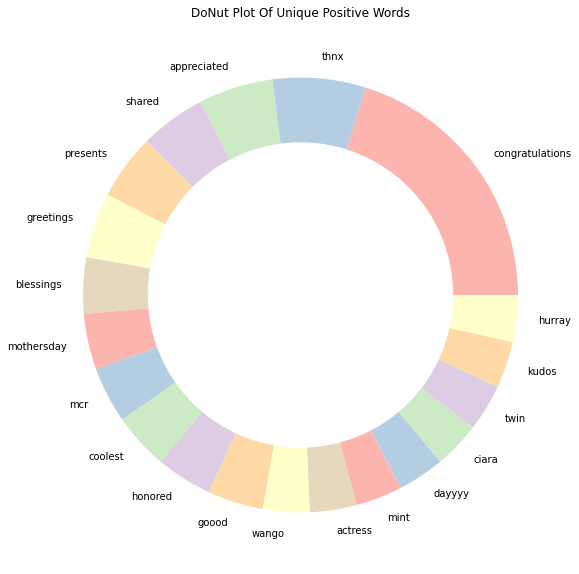

In [89]:
from palettable.colorbrewer.qualitative import Pastel1_7
plt.figure(figsize=(16,10))
my_circle=plt.Circle((0,0), 0.7, color='white')
plt.pie(Unique_Positive['count'], labels=Unique_Positive.words, colors=Pastel1_7.hex_colors)
p=plt.gcf()
p.gca().add_artist(my_circle)
plt.title('DoNut Plot Of Unique Positive Words')
plt.show()

In [90]:
# # 1)Modelling the Problem as NER
# # Named Entity Recognition (NER) is a standard NLP problem which involves spotting named entities
# (people, places, organizations etc.) from a chunk of text, and classifying them into a predefined set 
# of categories.
# For understanding NER here is very good article
# : https://towardsdatascience.com/named-entity-recognition-with-nltk-and-spacy-8c4a7d88e7da

# # We will be using spacy for creating our own customised NER model or models (seperate for each Sentiment)
# .The motivation for this approach is off course the kernel shared by Rohit Singh,so if you find his kernel
# useful please upvote it.

# # What will be different with my solution:

# # I will use text as selected_text for all neutral tweets due to their high jaccard similarity
# # Also I will use text as selected_text for all tweets having number of words less
# than 3 in text as explained before
# # I will train two different models for Positive and Negtive tweets
# # I will not preprocess the data because the selected text contains raw text

In [91]:
df_train = pd.read_csv('/Users/arslanaliawan/Desktop/testing/Twitter_sentiment_extraction/train.csv')
df_test = pd.read_csv('/Users/arslanaliawan/Desktop/testing/Twitter_sentiment_extraction/test.csv')
df_submission = pd.read_csv('/Users/arslanaliawan/Desktop/testing/Twitter_sentiment_extraction/sample_submission.csv')

In [92]:
df_train['Num_words_text'] = df_train['text'].apply(lambda x:len(str(x).split()))
#Number Of words in main Text in train set

In [93]:
df_train = df_train[df_train['Num_words_text']>=3]

In [94]:
# For Full Understanding of the how to train spacy NER with custom inputs, please read 
# the spacy documentation along with the code presentation in this notebook 
# : https://spacy.io/usage/training#ner Follow along from Updating Spacy NER

In [96]:
def save_model(output_dir, nlp, new_model_name):
    ''' This Function Saves model to 
    given output directory'''
    
    output_dir = f'/Users/arslanaliawan/Desktop/testing/Twitter_sentiment_extraction/{output_dir}'
    if output_dir is not None:        
        if not os.path.exists(output_dir):
            os.makedirs(output_dir)
        nlp.meta["name"] = new_model_name
        nlp.to_disk(output_dir)
        print("Saved model to", output_dir)

In [97]:
def train(train_data, output_dir, n_iter=20, model=None):
    """Load the model, set up the pipeline and train the entity recognizer."""
    ""
    if model is not None:
        nlp = spacy.load(output_dir)  # load existing spaCy model
        print("Loaded model '%s'" % model)
    else:
        nlp = spacy.blank("en")  # create blank Language class
        print("Created blank 'en' model")
    
    # create the built-in pipeline components and add them to the pipeline
    # nlp.create_pipe works for built-ins that are registered with spaCy
    if "ner" not in nlp.pipe_names:
        ner = nlp.create_pipe("ner")
        nlp.add_pipe(ner, last=True)
    # otherwise, get it so we can add labels
    else:
        ner = nlp.get_pipe("ner")
    
    # add labels
    for _, annotations in train_data:
        for ent in annotations.get("entities"):
            ner.add_label(ent[2])

    # get names of other pipes to disable them during training
    other_pipes = [pipe for pipe in nlp.pipe_names if pipe != "ner"]
    with nlp.disable_pipes(*other_pipes):  # only train NER
        # sizes = compounding(1.0, 4.0, 1.001)
        # batch up the examples using spaCy's minibatch
        if model is None:
            nlp.begin_training()
        else:
            nlp.resume_training()


        for itn in tqdm(range(n_iter)):
            random.shuffle(train_data)
            batches = minibatch(train_data, size=compounding(4.0, 500.0, 1.001))    
            losses = {}
            for batch in batches:
                texts, annotations = zip(*batch)
                nlp.update(texts,  # batch of texts
                            annotations,  # batch of annotations
                            drop=0.5,   # dropout - make it harder to memorise data
                            losses=losses, 
                            )
            print("Losses", losses)
    save_model(output_dir, nlp, 'st_ner')

In [98]:
def get_model_out_path(sentiment):
    '''
    Returns Model output path
    '''
    model_out_path = None
    if sentiment == 'positive':
        model_out_path = 'models/model_pos'
    elif sentiment == 'negative':
        model_out_path = 'models/model_neg'
    return model_out_path

In [99]:
def get_training_data(sentiment):
    '''
    Returns Trainong data in the format needed to train spacy NER
    '''
    train_data = []
    for index, row in df_train.iterrows():
        if row.sentiment == sentiment:
            selected_text = row.selected_text
            text = row.text
            start = text.find(selected_text)
            end = start + len(selected_text)
            train_data.append((text, {"entities": [[start, end, 'selected_text']]}))
    return train_data

In [100]:
# Training models for Positive and Negative tweets

In [101]:
sentiment = 'positive'

train_data = get_training_data(sentiment)
model_path = get_model_out_path(sentiment)
# For DEmo Purposes I have taken 3 iterations you can train the model as you want
train(train_data, model_path, n_iter=3, model=None)

Created blank 'en' model


 33%|███▎      | 1/3 [01:53<03:46, 113.28s/it]

Losses {'ner': 467.5162434291918}


 67%|██████▋   | 2/3 [04:06<02:05, 125.02s/it]

Losses {'ner': 291.5764925758009}


100%|██████████| 3/3 [09:47<00:00, 195.71s/it]

Losses {'ner': 279.597136961991}
Saved model to /Users/arslanaliawan/Desktop/testing/Twitter_sentiment_extraction/models/model_pos


In [102]:
sentiment = 'negative'

train_data = get_training_data(sentiment)
model_path = get_model_out_path(sentiment)

train(train_data, model_path, n_iter=3, model=None)

Created blank 'en' model


 33%|███▎      | 1/3 [01:42<03:24, 102.41s/it]

Losses {'ner': 463.63089128040343}


 67%|██████▋   | 2/3 [03:39<01:51, 111.14s/it]

Losses {'ner': 306.2866392140421}


100%|██████████| 3/3 [06:49<00:00, 136.61s/it]

Losses {'ner': 290.2321360616087}
Saved model to /Users/arslanaliawan/Desktop/testing/Twitter_sentiment_extraction/models/model_neg


In [103]:
# Predicting with the trained Model

In [104]:
def predict_entities(text, model):
    doc = model(text)
    ent_array = []
    for ent in doc.ents:
        start = text.find(ent.text)
        end = start + len(ent.text)
        new_int = [start, end, ent.label_]
        if new_int not in ent_array:
            ent_array.append([start, end, ent.label_])
    selected_text = text[ent_array[0][0]: ent_array[0][1]] if len(ent_array) > 0 else text
    return selected_text

In [106]:
selected_texts = []
MODELS_BASE_PATH = '/Users/arslanaliawan/Desktop/testing/Twitter_sentiment_extraction/models/'

if MODELS_BASE_PATH is not None:
    print("Loading Models  from ", MODELS_BASE_PATH)
    model_pos = spacy.load(MODELS_BASE_PATH + 'model_pos')
    model_neg = spacy.load(MODELS_BASE_PATH + 'model_neg')
        
    for index, row in df_test.iterrows():
        text = row.text
        output_str = ""
        if row.sentiment == 'neutral' or len(text.split()) <= 2:
            selected_texts.append(text)
        elif row.sentiment == 'positive':
            selected_texts.append(predict_entities(text, model_pos))
        else:
            selected_texts.append(predict_entities(text, model_neg))
        
df_test['selected_text'] = selected_texts

Loading Models  from  /Users/arslanaliawan/Desktop/testing/Twitter_sentiment_extraction/models/


In [107]:
df_submission['selected_text'] = df_test['selected_text']
df_submission.to_csv("/Users/arslanaliawan/Desktop/testing/Twitter_sentiment_extraction/models/submission.csv", index=False)


In [109]:
display(df_submission.head(20))

,textID,selected_text
0,f87dea47db,Last session of the day http://twitpic.com/67ezh
1,96d74cb729,exciting
2,eee518ae67,"Recession hit Veronique Branquinho, she has to..."
3,01082688c6,happy bday!
4,33987a8ee5,http://twitpic.com/4w75p - I like it!!
5,726e501993,that`s great!! weee!! visitors!
6,261932614e,HATES
7,afa11da83f,completely blocked
8,e64208b4ef,and within a short time of the last clue all ...
9,37bcad24ca,What did you get? My day is alright.. haven`...


In [ ]:
#  Easy example to focus on NER

In [132]:
text = "Apple acquired Zoom in China on Wednesday 6th May 2020.\
This news has made Apple and Google stock jump by 5% on Dow Jones Index in the \
United States of America"

In [133]:
import nltk
import pandas as pd

In [134]:
words = nltk.word_tokenize(text)
words

['Apple',
 'acquired',
 'Zoom',
 'in',
 'China',
 'on',
 'Wednesday',
 '6th',
 'May',
 '2020.This',
 'news',
 'has',
 'made',
 'Apple',
 'and',
 'Google',
 'stock',
 'jump',
 'by',
 '5',
 '%',
 'on',
 'Dow',
 'Jones',
 'Index',
 'in',
 'the',
 'United',
 'States',
 'of',
 'America']

In [135]:
pos_tags = nltk.pos_tag(words)
pos_tags

[('Apple', 'NNP'),
 ('acquired', 'VBD'),
 ('Zoom', 'NNP'),
 ('in', 'IN'),
 ('China', 'NNP'),
 ('on', 'IN'),
 ('Wednesday', 'NNP'),
 ('6th', 'CD'),
 ('May', 'NNP'),
 ('2020.This', 'CD'),
 ('news', 'NN'),
 ('has', 'VBZ'),
 ('made', 'VBN'),
 ('Apple', 'NNP'),
 ('and', 'CC'),
 ('Google', 'NNP'),
 ('stock', 'NN'),
 ('jump', 'NN'),
 ('by', 'IN'),
 ('5', 'CD'),
 ('%', 'NN'),
 ('on', 'IN'),
 ('Dow', 'NNP'),
 ('Jones', 'NNP'),
 ('Index', 'NNP'),
 ('in', 'IN'),
 ('the', 'DT'),
 ('United', 'NNP'),
 ('States', 'NNPS'),
 ('of', 'IN'),
 ('America', 'NNP')]

In [136]:
#check nltk help for description of the tag
nltk.help.upenn_tagset('DT')

DT: determiner
    all an another any both del each either every half la many much nary
    neither no some such that the them these this those


In [137]:
chunks = nltk.ne_chunk(pos_tags, binary=True) #either NE or not NE
for chunk in chunks:
    print(chunk)

(NE Apple/NNP)
('acquired', 'VBD')
('Zoom', 'NNP')
('in', 'IN')
(NE China/NNP)
('on', 'IN')
('Wednesday', 'NNP')
('6th', 'CD')
('May', 'NNP')
('2020.This', 'CD')
('news', 'NN')
('has', 'VBZ')
('made', 'VBN')
(NE Apple/NNP)
('and', 'CC')
(NE Google/NNP)
('stock', 'NN')
('jump', 'NN')
('by', 'IN')
('5', 'CD')
('%', 'NN')
('on', 'IN')
('Dow', 'NNP')
('Jones', 'NNP')
('Index', 'NNP')
('in', 'IN')
('the', 'DT')
(NE United/NNP States/NNPS)
('of', 'IN')
(NE America/NNP)


In [138]:
entities =[]
labels =[]
for chunk in chunks:
    if hasattr(chunk,'label'):
        #print(chunk)
        entities.append(' '.join(c[0] for c in chunk))
        labels.append(chunk.label())
        
entities_labels = list(set(zip(entities, labels)))
entities_df = pd.DataFrame(entities_labels)
entities_df.columns = ["Entities","Labels"]
entities_df

,Entities,Labels
0,China,NE
1,Google,NE
2,America,NE
3,United States,NE
4,Apple,NE


In [139]:
chunks = nltk.ne_chunk(pos_tags, binary=False)
entities =[]
labels =[]
for chunk in chunks:
    if hasattr(chunk,'label'):
        #print(chunk)
        entities.append(' '.join(c[0] for c in chunk))
        labels.append(chunk.label())
        
entities_labels = list(set(zip(entities, labels)))
entities_df = pd.DataFrame(entities_labels)
entities_df.columns = ["Entities","Labels"]
entities_df

,Entities,Labels
0,United States,GPE
1,America,GPE
2,Dow Jones Index,PERSON
3,Google,ORGANIZATION
4,Apple,PERSON
5,Zoom,PERSON
6,China,GPE


In [140]:
# Using Spacy

In [141]:
import spacy 
from spacy import displacy
#SpaCy 2.x brough significant speed and accuracy improvements
spacy.__version__

'2.0.18'

In [143]:
# !python3 -m spacy download en_core_web_sm

In [144]:
nlp = spacy.load("en_core_web_sm")

In [145]:
doc = nlp(text)

In [146]:
entities = []
labels = []
position_start = []
position_end = []

In [147]:
for ent in doc.ents:
    entities.append(ent)
    labels.append(ent.label_)
    position_start.append(ent.start_char)
    position_end.append(ent.end_char)
    
df = pd.DataFrame({'Entities':entities,'Labels':labels,'Position_Start':position_start, 'Position_End':position_end})

In [148]:
df

,Entities,Labels,Position_Start,Position_End
0,(Apple),ORG,0,5
1,(Zoom),PERSON,15,19
2,(China),GPE,23,28
3,"(Wednesday, 6th)",DATE,32,45
4,(Apple),ORG,74,79
5,(Google),ORG,84,90
6,"(5, %)",PERCENT,105,107
7,"(Dow, Jones)",ORG,111,120
8,"(the, United, States, of, America)",GPE,130,158
